# Preview a bunch of trajectories from individual experiments as a table of plots

#### Written by Matan Yah Ben Zion 20230305

In [6]:
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact
import time
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def l2n(x):
    return np.array(x)

In [23]:
expSumFileName = 'transportExpSum20230305bots21_.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 

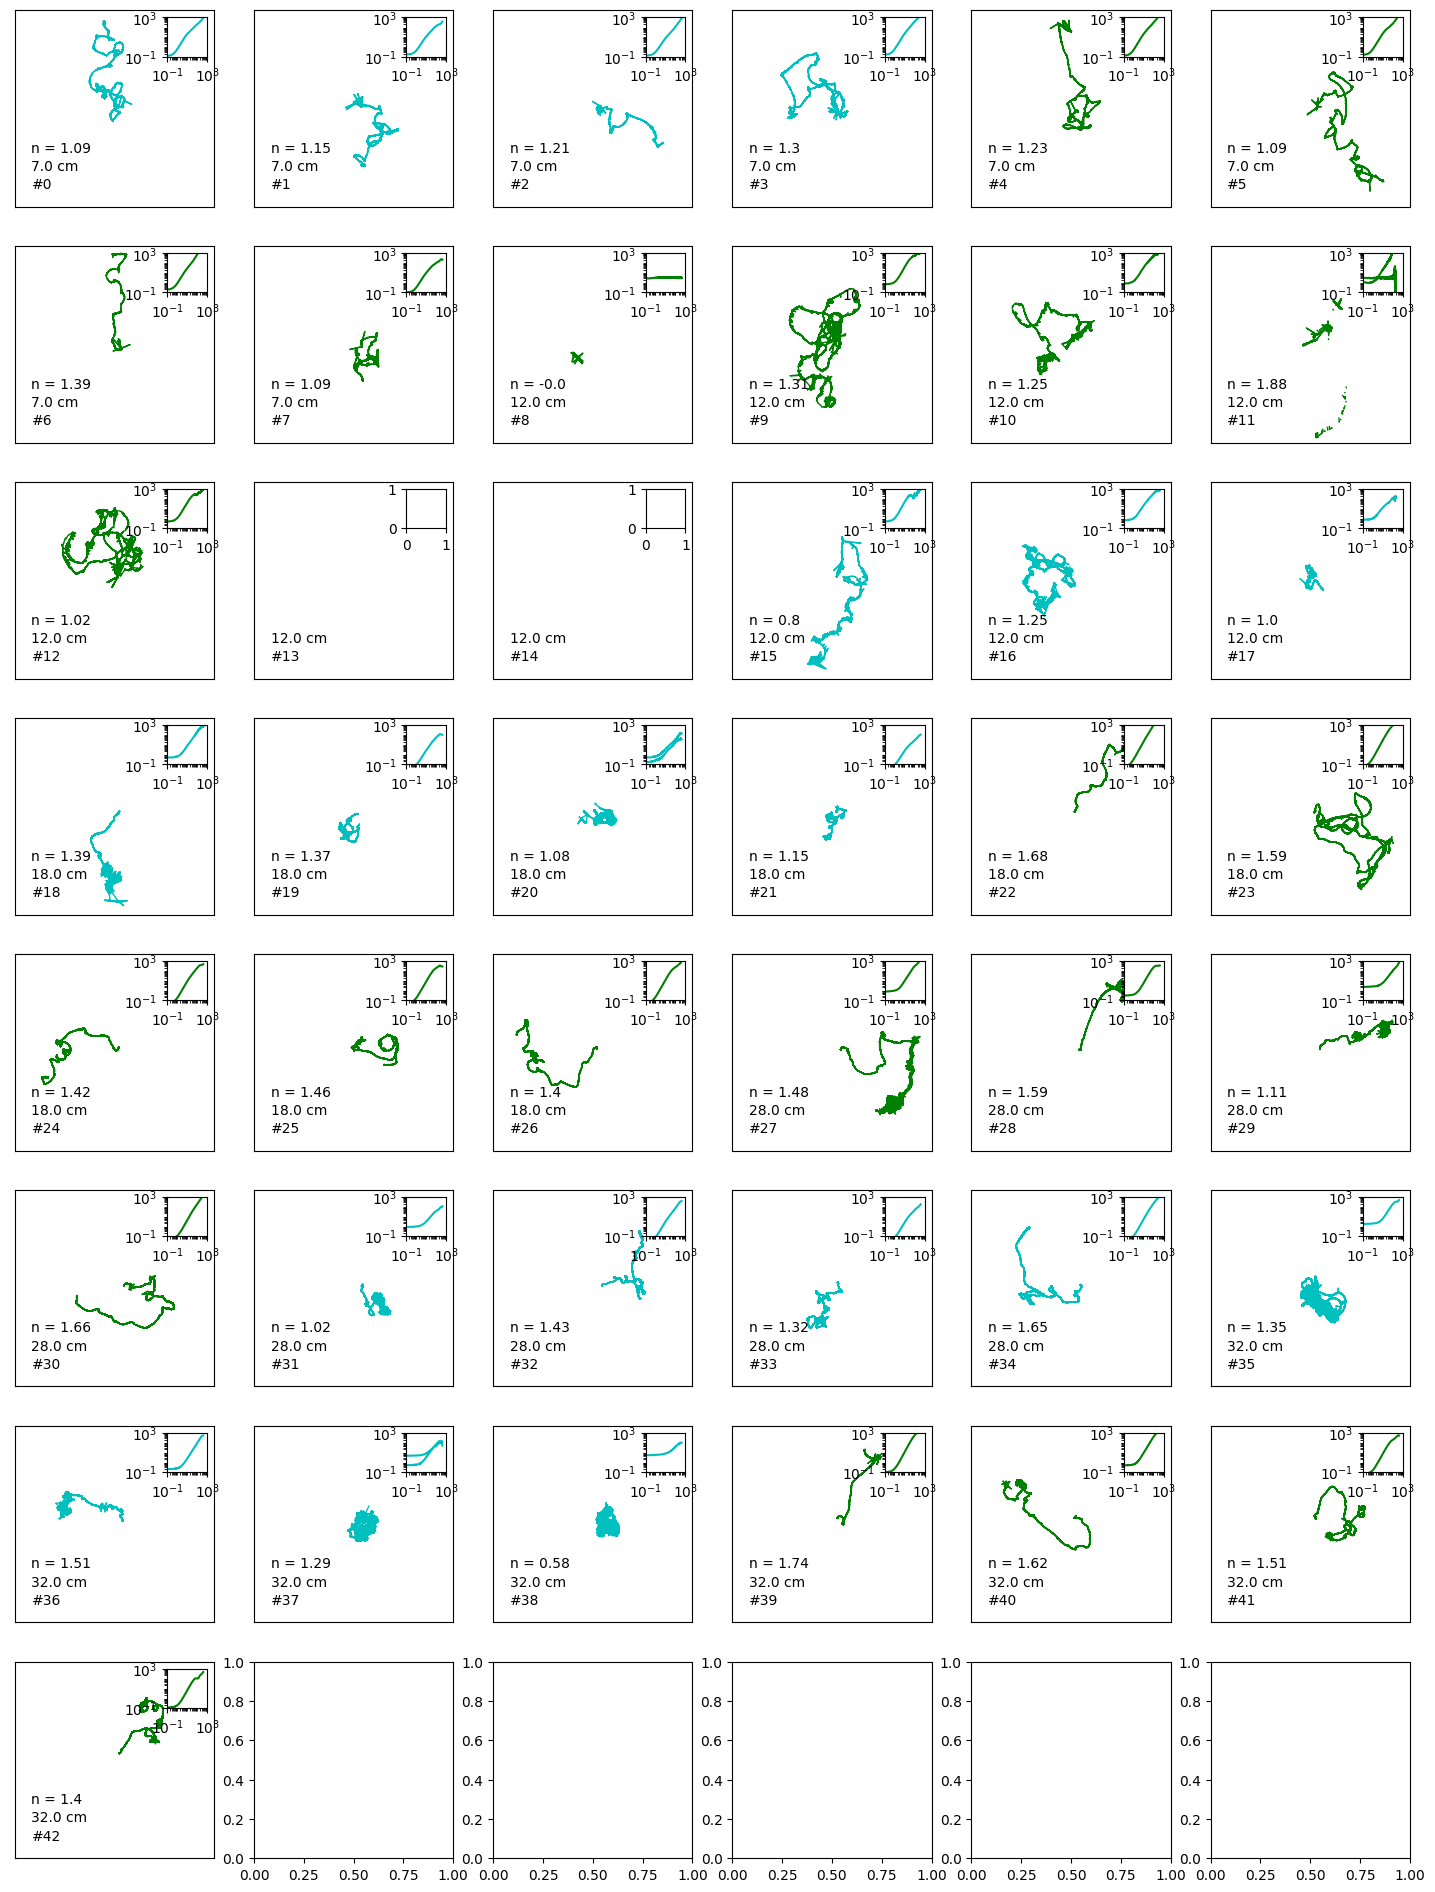

In [54]:
alignerColor = 'c'
fronterColor = 'g'
nrows = 8
ncols = 6
fig3,axs3 = plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,24))
df=[]
for index,row in expSum.iterrows():
    botType = row.bottype
    passDiam = row['passiveDiameter[cm]']
    Nbots = row['bots']
    fileNameLinked = row['linkingFileName']
    pixelSize = row['pixelSize [cm/pixel]']
    fps = row['fps']
    
    df = pd.read_csv(fileNameLinked)#,index_col=0)
    nParticles = len(df.particle.unique())
    i = int(index/ncols)
    j = index%ncols
    ax = axs3[i,j]
    axins = inset_axes(ax, width="20%", height="20%")
    if(nParticles>0):
        if botType =='aligner':
            color = alignerColor
        elif botType =='fronter':
            color = fronterColor
        tp.plot_traj(df,ax=ax,plot_style={'color':color})
        imsd = tp.imsd(df,pixelSize, fps=fps,max_lagtime=10000)
        axins.loglog(imsd,color=color)
        axins.axis([1E-1,1E3,1E-1,1E3])
        axins.set_xticks([1E-1,1E3])
        axins.set_yticks([1E-1,1E3])
        cond = (1<imsd.index)&(imsd.index<100)
        powerLawFit = tp.utils.fit_powerlaw(imsd[cond],plot=False)
        power = powerLawFit.n.values[0]
        ax.text(100,300,'n = '+str(np.round(power,2)))
                         
    ax.axis([0,1200,0,1080])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(100,100,'#'+str(index))
    ax.text(100,200,str(passDiam)+' cm')
    print(str(index)+', ', end="")
fig3.savefig('allTrajectoriesAndMSDs_.png',bbox_inches='tight')

In [57]:
np.arange([1,2,3])

TypeError: unsupported operand type(s) for -: 'list' and 'int'

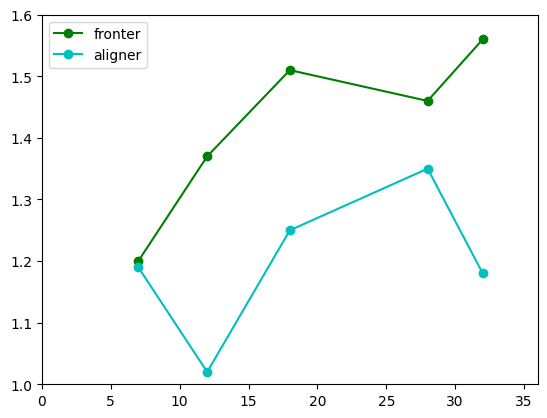

In [65]:
powFr = l2n([1.2,1.37,1.51,1.46,1.56])
powAl = l2n([1.19,1.02,1.25,1.35,1.18])
ds = l2n([7,12,18,28,32])

fig,ax =plt.subplots()

ax.plot(ds,powFr,color = fronterColor,label='fronter',marker='o')
ax.plot(ds,powAl,color = alignerColor,label='aligner',marker='o')
ax.legend()
ax.axis([0,36,1,1.6])
fig.savefig('meanPowerLaw21bots_.png',bbox_inches='tight')

In [52]:
zzz = imsd.copy()
cond = (1<imsd.index)&(imsd.index<100)
power = tp.utils.fit_powerlaw(imsd[cond],plot=False)
power.n.values[0]

1.3956596067890956

In [66]:
pwd

'C:\\Users\\User\\Documents\\Eden\\locate_git_code'